In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

In [2]:
df = pd.DataFrame(
{
    "A":[1,np.nan,3,4,5],
    "B":[6,7,8,np.nan,10],
    "C":[11,12,13,14,15],
})
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [3]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [7]:
df.dropna()

,A,B,C
0,1.0,6.0,11
2,3.0,8.0,13
4,5.0,10.0,15


In [13]:
imp = Imputer(strategy = "mean",axis=0)
imp.fit(df)
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

In [20]:
df = pd.DataFrame(
{
    "A":[1,2,3,4,5],
    "B":["a","b","a","b","c"],
})
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [23]:
#カテゴリ変数のエンコーディング
le = LabelEncoder()
le.fit(df["B"])
le.transform(df["B"])

array([0, 1, 0, 1, 2])

In [24]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [26]:
df_ohe = df.copy()
le = LabelEncoder()
df_ohe["B"] = le.fit_transform(df_ohe["B"])
ohe = OneHotEncoder(categorical_features=[1])
ohe.fit_transform(df_ohe).toarray()

array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

In [30]:
df = pd.DataFrame(
{
    "A":[1,2,3,4,5],
    "B":[200,250,350,370,400],
})
df

,A,B
0,1,200
1,2,250
2,3,350
3,4,370
4,5,400


In [31]:
# 分散正規化
stdsc = StandardScaler()
stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.4989623 ],
       [-0.70710678, -0.84152269],
       [ 0.        ,  0.47335651],
       [ 0.70710678,  0.73633236],
       [ 1.41421356,  1.13079612]])

In [33]:
#最小最大正規化
mmsc = MinMaxScaler()
mmsc.fit(df)
mmsc.transform(df)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.75],
       [0.75, 0.85],
       [1.  , 1.  ]])

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data,iris.target
print("X:")
print(X[:5,:])
print("y:")
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


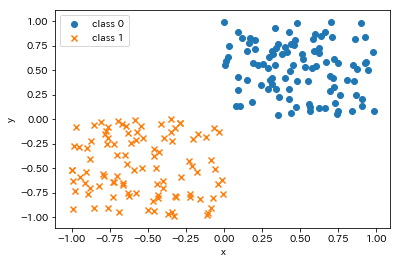

In [42]:
np.random.seed(123)
#0〜1までの一様分布から１００点サンプリング
X0 = np.random.uniform(size = (100,2))
#クラス０ラベル１００個生成
y0 = np.repeat(0,100)

X1 = np.random.uniform(-1.0,0.0,size = (100,2))
y1 = np.repeat(1,100)

fig,ax = plt.subplots()
ax.scatter(X0[:,0],X0[:,1],marker="o",label="class 0")
ax.scatter(X1[:,0],X1[:,1],marker="x",label="class 1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [176]:
from sklearn.svm import SVC
#kernel :データ間の近さ　C：マージン
def plot_boundary_margin_sv(X0,y0,X1,y1,kernel,C,xmin=-1,xmax=1,ymin=-1,ymax=1):
    svc = SVC(kernel=kernel,C=C)
    #学習
    svc.fit(np.vstack((X0,X1)),np.hstack((y0,y1)))
    
    fig,ax = plt.subplots()
    ax.scatter(X0[:,0],X0[:,1],marker="o",label="class 0")
    ax.scatter(X1[:,0],X1[:,1],marker="x",label="class 1")
    
    #決定境界とマージンをプロット
    xx,yy = np.meshgrid(np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100))
    xy = np.vstack([xx.ravel(),yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100,100))
    ax.contour(xx,yy,p,
               colors="k",levels=[-1,0,1],
               alpha=0.5,linestyles=["--","-","--"])
    #サポートベクターをプロット
    ax.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=250,facecolors="none",edgecolors="black")
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")
    plt.show()

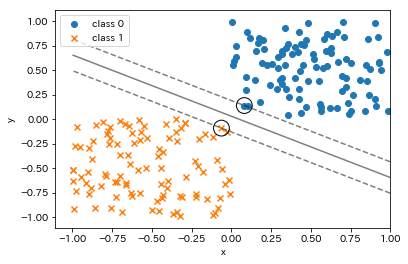

In [124]:
plot_boundary_margin_sv(X0,y0,X1,y1,kernel="linear",C=1e6)

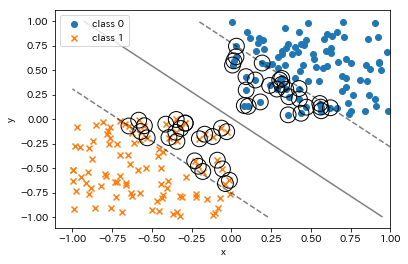

In [125]:
plot_boundary_margin_sv(X0,y0,X1,y1,kernel="linear",C=0.1)

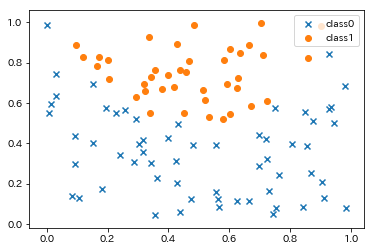

In [128]:
np.random.seed(123)
X = np.random.random(size=(100,2))
# 2(x-0.5)^2 + 0.5
y = (X[:,1] > 2*(X[:,0]-0.5)**2+0.5).astype(int)
fig,ax = plt.subplots()
ax.scatter(X[y==0,0],X[y==0,1],marker="x",label="class0")
ax.scatter(X[y==1,0],X[y==1,1],marker="o",label="class1")
ax.legend()
plt.show()

In [132]:
y

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

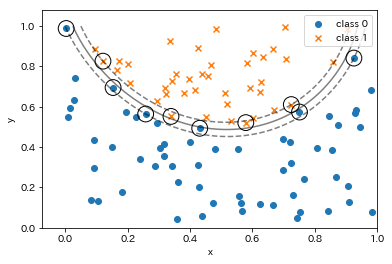

In [137]:
X0,X1 = X[y==0,:],X[y==1,:]
y0,y1 = y[y==0],y[y==1]
#rbf : 動径基底関数
plot_boundary_margin_sv(X0,y0,X1,y1,kernel="rbf",C=1e3,xmin=0,ymin=0)

In [157]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X,y = iris.data,iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [160]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(
    tree,filled=True,
    rounded=True,
    class_names=["Setosa","Versicolor","Virginica"],
    feature_names = ["Sepal Length","Sepal Width","petal Length","petal Width"],
    out_file = None
)
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")


True

In [161]:
#予測
y_pred = tree.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1])

In [155]:
from sklearn.ensemble import RandomForestClassifier
#決定木を１００個生成
forest = RandomForestClassifier(n_estimators=100,random_state=123)
forest.fit(X_train,y_train)
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X,y = boston.data,boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=123)
lr = LinearRegression()
lr.fit(X_train,y_train)

/Users/sasakihiroyuki/python_sample/pydataenv/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [163]:
y_pred = lr.predict(X_test)

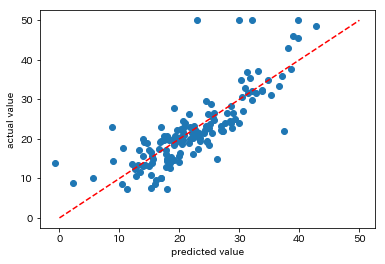

In [166]:
fig,ax = plt.subplots()
ax.scatter(y_pred,y_test)
ax.plot((0,50),(0,50),linestyle ="dashed",color="red")

ax.set_xlabel("predicted value")
ax.set_ylabel("actual value")
plt.show()

In [167]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

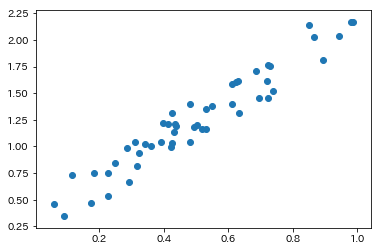

In [169]:
np.random.seed(123)
X = np.random.random(size=50)
Y = 2*X + 0.5*np.random.rand(50)
fig,ax = plt.subplots()
ax.scatter(X,Y)
plt.show()

In [171]:
#主成分分析
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.hstack((X[:,np.newaxis],Y[:,np.newaxis])))

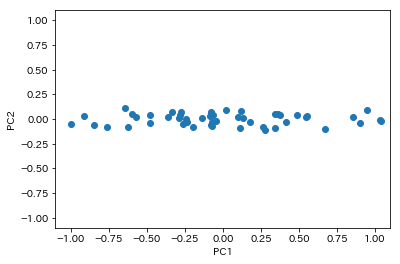

In [173]:
fig,ax = plt.subplots()
ax.scatter(X_pca[:,0],X_pca[:,1])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
plt.show()

In [181]:
from sklearn.metrics import classification_report
X,y = iris.data[:100,:],iris.target[:100]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=123)
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

#precision(適合率)　recall(再現率)　f1-score(F値)　support(データ件数)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        30



In [183]:
#交差検証
from sklearn.model_selection import cross_val_score
cross_val_score(svc,X,y,cv = 10,scoring="precision")

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

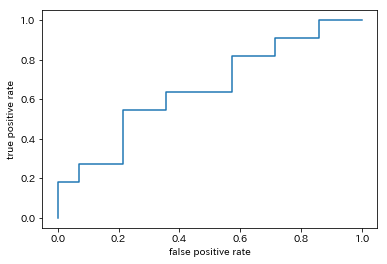

In [184]:
fpr = np.array([0,0,0,1,1,2,3,3,3,3,4,5,5,6,7,8,8,8,9,10,10,11,12,12,13,14])/14
tpr = np.array([0,1,2,2,3,3,3,4,5,6,6,6,7,7,7,7,8,9,9,9,10,10,10,11,11,11])/11
fig,ax = plt.subplots()
ax.step(fpr,tpr)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
plt.show()

In [186]:
from sklearn.metrics import roc_curve
labels = np.array([1,1,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0])
probs = np.array([
    0.98,
    0.95,
    0.9,
    0.87,
    0.85,
    0.8,
    0.75,
    0.71,
    0.63,
    0.55,
    0.51,
    0.47,
    0.43,
    0.38,
    0.35,
    0.31,
    0.28,
    0.24,
    0.22,
    0.19,
    0.15,
    0.12,
    0.08,
    0.04,
    0.01
])
fpr,tpr,threshold = roc_curve(labels,probs)
print("偽陽性率",fpr)
print("真陽性率",tpr)

偽陽性率 [0.         0.         0.07142857 0.07142857 0.21428571 0.21428571
 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571 0.71428571
 0.85714286 0.85714286 1.        ]
真陽性率 [0.09090909 0.18181818 0.18181818 0.27272727 0.27272727 0.54545455
 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182 0.90909091
 0.90909091 1.         1.        ]


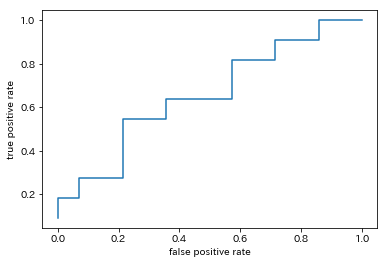

In [187]:
fig,ax = plt.subplots()
ax.step(fpr,tpr)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
plt.show()

In [188]:
from sklearn.metrics import roc_auc_score
roc_auc_score(labels,probs)

0.6558441558441558

In [190]:
from sklearn.model_selection import GridSearchCV
X,y = iris.data,iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=123)
clf = DecisionTreeClassifier()
param_grid={"max_depth":[3,4,5]}
# 10分割の交差検証を実行
cv = GridSearchCV(clf,param_grid = param_grid,cv = 10)
cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [191]:
cv.best_params_

{'max_depth': 4}

In [192]:
#最適なモデルを確認
cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [193]:
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [194]:
x = 10000
y = 161.1+0.0020305 * x
y

181.405

In [195]:
#クラスタリング
data = iris.data
X = data[:100,[0,2]]

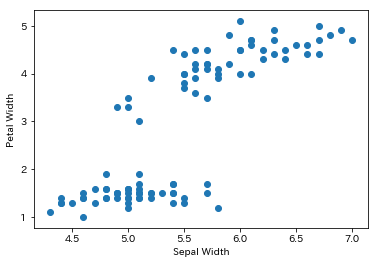

In [196]:
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1])
ax.set_xlabel("Sepal Width")
ax.set_ylabel("Petal Width")
plt.show()

In [199]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init="random",n_init=10,random_state=123)
y_km = km.fit_predict(X)

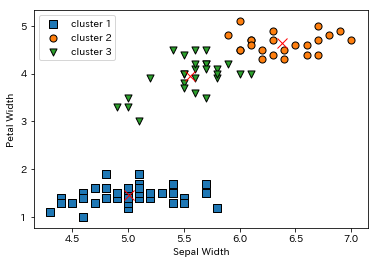

In [203]:
fig,ax = plt.subplots()
# クラスタ１
ax.scatter(X[y_km == 0,0],X[y_km == 0,1],s=50,edgecolors="black",marker="s",label="cluster 1")
# クラスタ中心
ax.plot(np.mean(X[y_km == 0,0]),np.mean(X[y_km == 0,1]),marker="x",color="red",markersize=10)

# クラスタ２
ax.scatter(X[y_km == 1,0],X[y_km == 1,1],s=50,edgecolors="black",marker="o",label="cluster 2")
# クラスタ中心
ax.plot(np.mean(X[y_km == 1,0]),np.mean(X[y_km == 1,1]),marker="x",color="red",markersize=10)

# クラスタ3
ax.scatter(X[y_km == 2,0],X[y_km == 2,1],s=50,edgecolors="black",marker="v",label="cluster 3")
# クラスタ中心
ax.plot(np.mean(X[y_km == 2,0]),np.mean(X[y_km == 2,1]),marker="x",color="red",markersize=10)

ax.set_xlabel("Sepal Width")
ax.set_ylabel("Petal Width")
ax.legend()
plt.show()

In [205]:
#凝集型クラスタリング
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
labels=ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0])

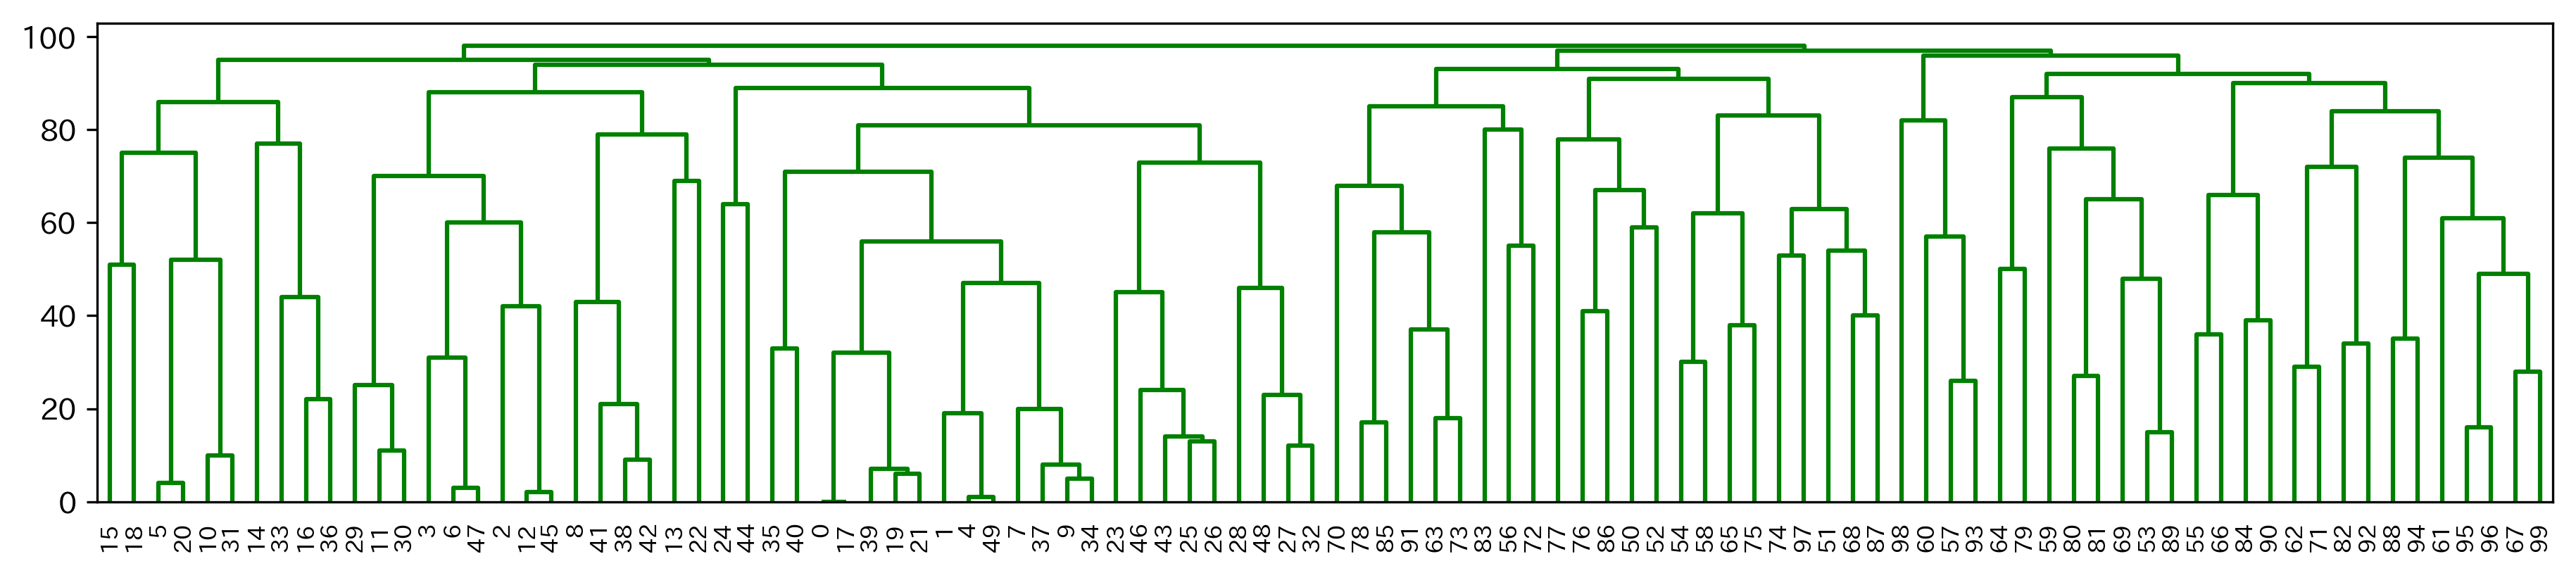

In [210]:
from scipy.cluster.hierarchy import dendrogram
children = ac.children_
#クラスタ間の距離を算出
distance = np.arange(children.shape[0])
# 各データの観測番号
no_of_observations = np.arange(2,children.shape[0]+2)
#子クラスタ、クラスタ間の距離、観測番号を列方向に結合
linkage_matrix  = np.hstack((children,distance[:,np.newaxis],no_of_observations[:,np.newaxis])).astype(float)
#樹形図をプロット
fix,ax = plt.subplots(figsize = (15,3),dpi = 300)
dendrogram(linkage_matrix,labels=np.arange(100),leaf_font_size=8,color_threshold=np.inf)
plt.show()